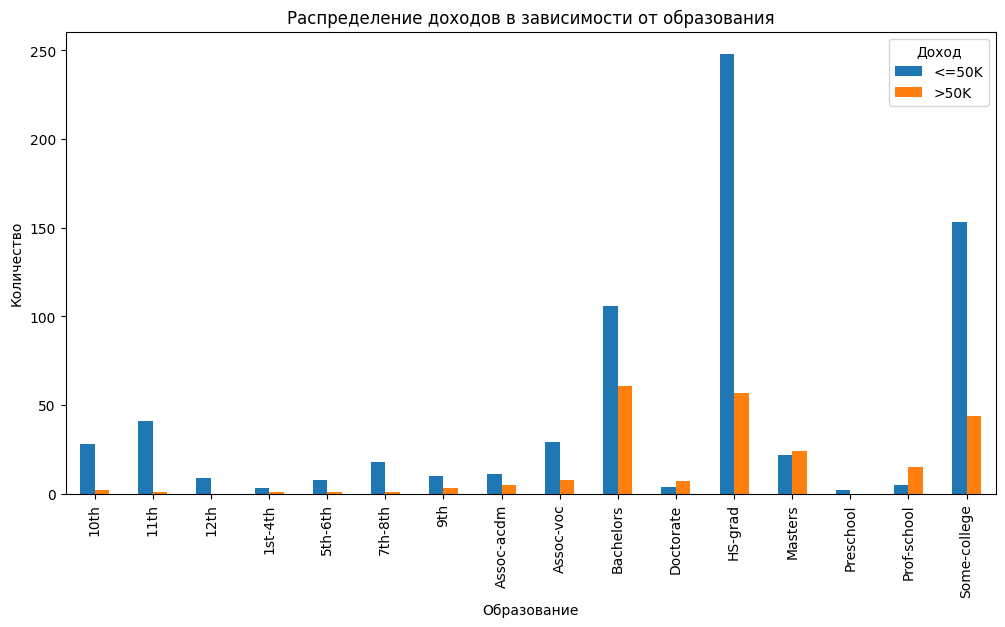

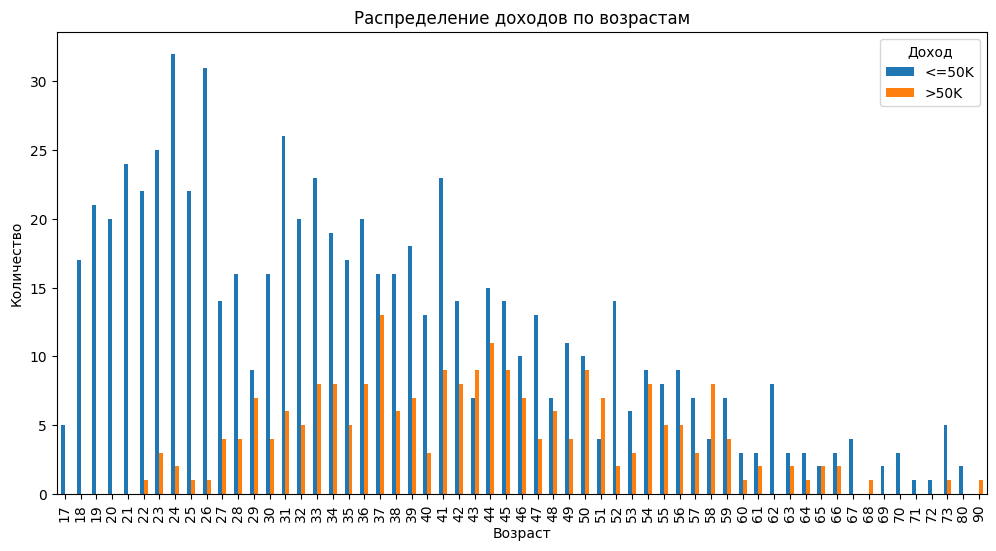

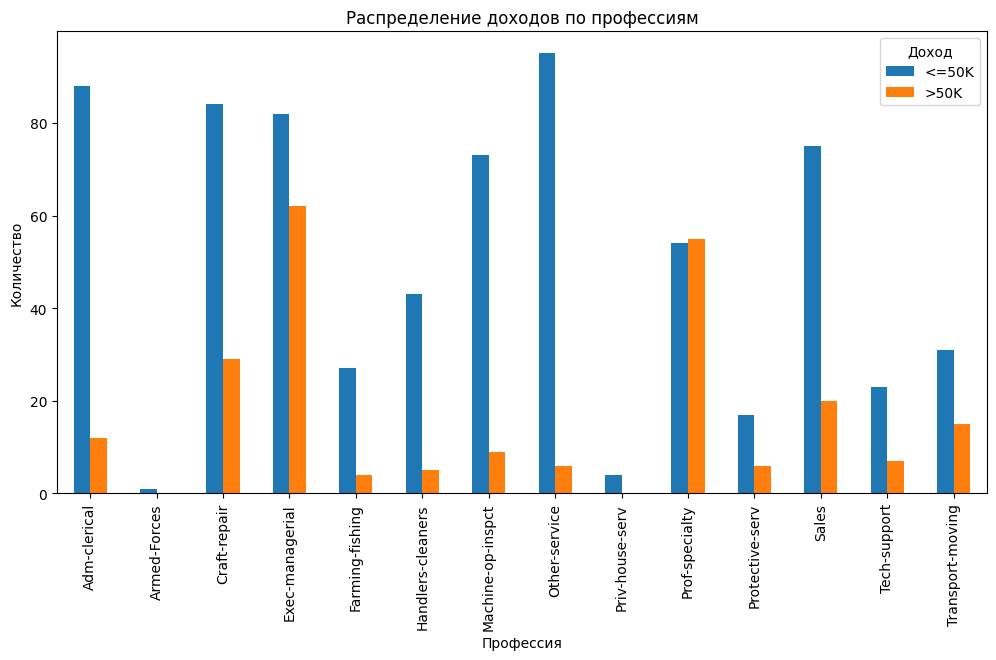

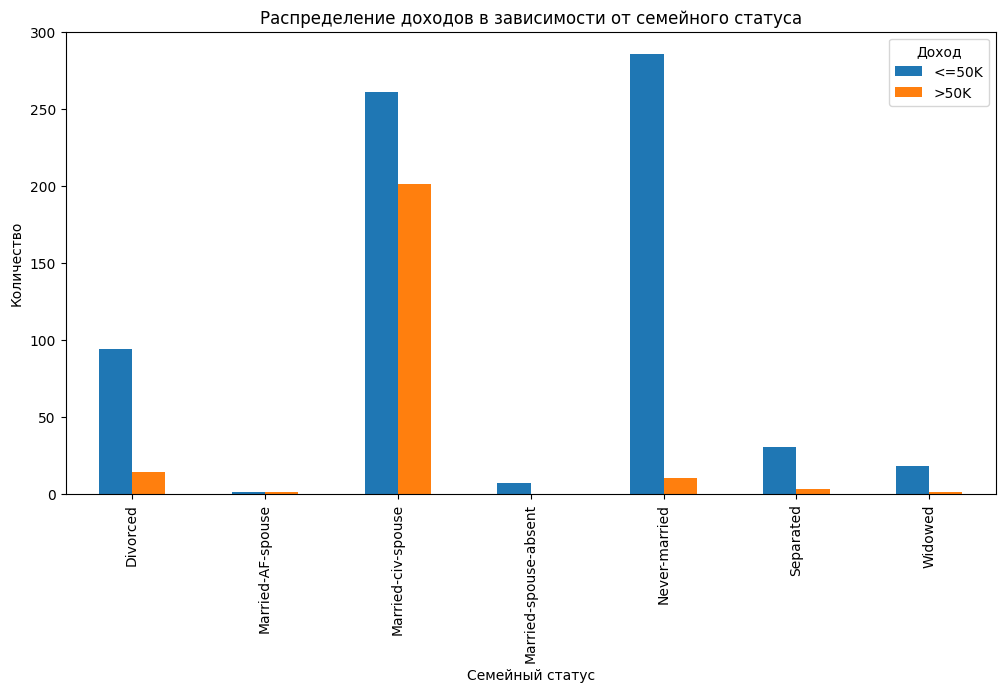

<Figure size 1200x600 with 0 Axes>

Logistic Regression Train Data Accuracy 0.8529014844804319
Logistic Regression Test Data Accuracy 0.7956989247311828
SVC Train Data Accuracy 0.7705802968960864
SVC Test Data Accuracy 0.7204301075268817


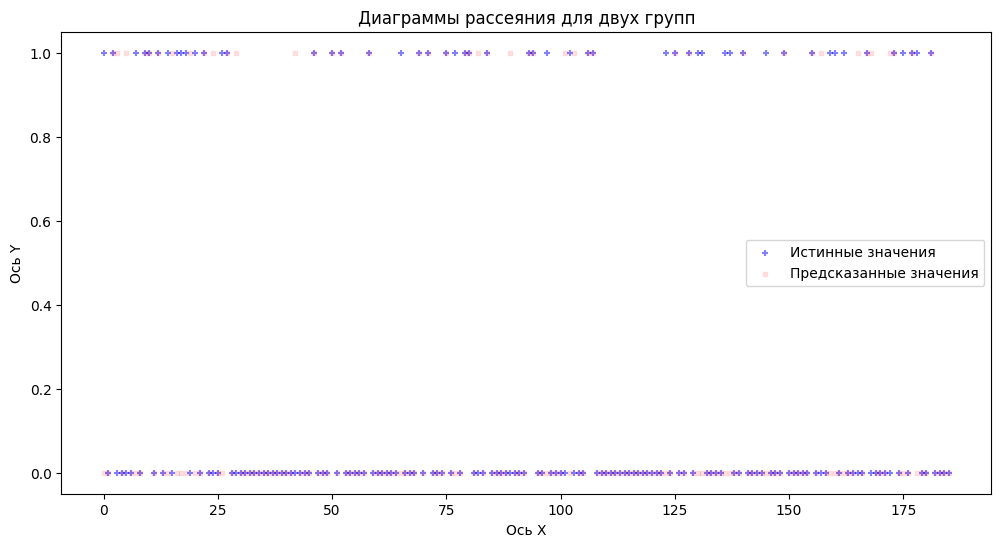

In [68]:
import pandas as pd # Для работы с данными
import numpy as np
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Импорт исходных данных из CSV-файла
data = pd.read_csv('adult.csv', nrows=1000)

# Выбираем все данные (на них наибольшая точность)
selectedColumns = dataZa
df = pd.DataFrame(selectedColumns)

# Удаление пропусков (вопросительных знаков)
contains_question_mark = df.apply(lambda x: x.str.contains(r'\?').any(), axis=1)
cleanData = df[~contains_question_mark]

# Преобразование категориальных признаков
# X = pd.get_dummies(cleanData, columns=['marital-status','education','occupation'], dtype='int', drop_first=True)
X = pd.get_dummies(cleanData, columns=['marital-status','education','occupation','workclass','relationship','race','gender','native-country'], dtype='int', drop_first=True)

# Удаление целевой переменной из общего массива
del X['income']

# Преобразуем категории дохода в числа
le = LabelEncoder()
le.fit(cleanData['income'])

# Размещаем целевую переменную в отдельном массиве y
y = pd.Series(le.transform(cleanData['income']))

# Подготовка данных для построения нескольких графиков
plt_1 = cleanData.groupby(['education','income']).size().unstack(fill_value=0)
plt_2 = cleanData.groupby(['age','income']).size().unstack(fill_value=0)
plt_3 = cleanData.groupby(['occupation','income']).size().unstack(fill_value=0)
plt_4 = cleanData.groupby(['marital-status','income']).size().unstack(fill_value=0)
plt_1.plot(kind='bar', stacked=False)
plt.title('Распределение доходов в зависимости от образования')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.legend(title='Доход')

plt_2.plot(kind='bar', stacked=False)
plt.title('Распределение доходов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Доход')

plt_3.plot(kind='bar', stacked=False)
plt.title('Распределение доходов по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Количество')
plt.legend(title='Доход')

plt_4.plot(kind='bar', stacked=False)
plt.title('Распределение доходов в зависимости от семейного статуса')
plt.xlabel('Семейный статус')
plt.ylabel('Количество')
plt.legend(title='Доход')

plt.rcParams['figure.figsize'] = (12, 6)  # Width: 12 inches, Height: 6 inches

fig = plt.figure()
plt.show()

# Создаем пайплайн для нормирования данных и обучения
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Разделяем данные для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель логистической регрессии
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Отображение метрик модели
print('Logistic Regression Train Data Accuracy', model.score(X_train, y_train))
print('Logistic Regression Test Data Accuracy', model.score(X_test, y_test))

# Обучаем модель SVC
svc = SVC(kernel='poly')

# Отображение метрик модели
svc.fit(X_train, y_train)
print('SVC Train Data Accuracy', svc.score(X_train, y_train))
print('SVC Test Data Accuracy', svc.score(X_test, y_test))

# Визуализация сравнения истинных значений и предсказаний на тестовой выборке
x = np.arange(0,len(predictions),1)
plt.figure(figsize=(12, 6))
plt.scatter(x, y_test, color='blue', alpha=0.5, label='Истинные значения',marker='+', s=20)
plt.scatter(x, predictions, color='red', alpha=0.1, label='Предсказанные значения',marker='s', s=10)
plt.title("Диаграммы рассеяния для двух групп")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.legend()
plt.show()